In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, max

spark = SparkSession.builder.appName("ProcessamentoSensores").getOrCreate()

df = spark.read.csv("sensores.csv", header=True, inferSchema=True)

df.printSchema()

df.show(5)

df_filtrado = df.filter(col("device_id") == "sensor_01")
df_filtrado.show(5)

df_filtrado.select(
    mean("temperatura").alias("media_temperatura"),
    max("temperatura").alias("maxima_temperatura"),
    mean("pressao").alias("media_pressao"),
    max("pressao").alias("maxima_pressao")
).show()



root
 |-- device_id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- temperatura: double (nullable = true)
 |-- pressao: integer (nullable = true)

+---------+-------------------+-----------+-------+
|device_id|          timestamp|temperatura|pressao|
+---------+-------------------+-----------+-------+
|sensor_01|2025-01-01 00:00:00|       41.2|   1012|
|sensor_02|2025-01-01 00:01:00|       37.8|   1105|
|sensor_03|2025-01-01 00:02:00|       60.5|   1600|
|sensor_01|2025-01-01 00:03:00|       35.7|    980|
|sensor_02|2025-01-01 00:04:00|       52.3|   1450|
+---------+-------------------+-----------+-------+
only showing top 5 rows

+---------+-------------------+-----------+-------+
|device_id|          timestamp|temperatura|pressao|
+---------+-------------------+-----------+-------+
|sensor_01|2025-01-01 00:00:00|       41.2|   1012|
|sensor_01|2025-01-01 00:03:00|       35.7|    980|
|sensor_01|2025-01-01 00:05:00|       44.1|   1020|
|sensor_01|2025-01-01

+---------+-------------------+-----------+-------+
|device_id|          timestamp|temperatura|pressao|
+---------+-------------------+-----------+-------+
|sensor_03|2025-01-01 00:02:00|       60.5|   1600|
|sensor_02|2025-01-01 00:04:00|       52.3|   1450|
|sensor_01|2025-01-01 00:07:00|       55.2|   1580|
+---------+-------------------+-----------+-------+

Total de anomalias encontradas: 3


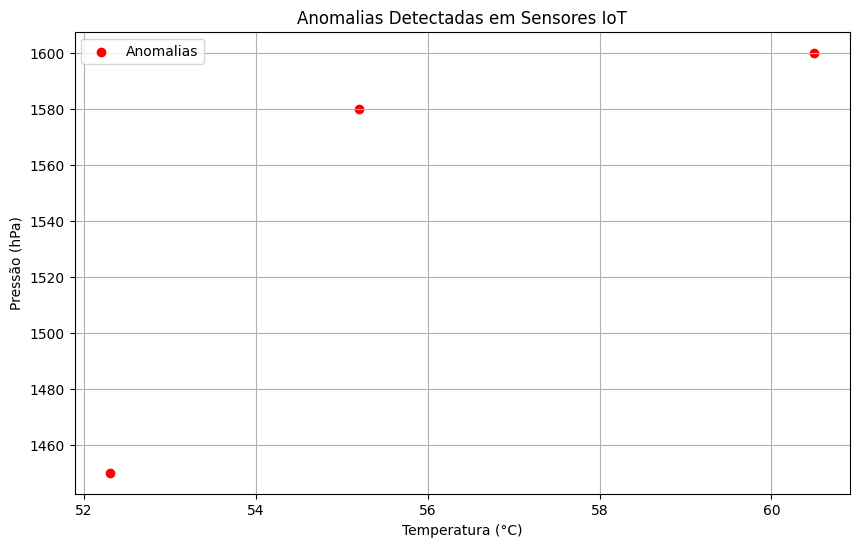

In [7]:
limite_temperatura = 50
limite_pressao = 1500

anomalias = df.filter((col("temperatura") > limite_temperatura) | (col("pressao") > limite_pressao))

anomalias.show(5)

print(f"Total de anomalias encontradas: {anomalias.count()}")

anomalias.write.csv("anomalias_detectadas.csv", header=True, mode="overwrite")

anomalias_pd = anomalias.toPandas()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(anomalias_pd['temperatura'], anomalias_pd['pressao'], c='red', label="Anomalias")
plt.title("Anomalias Detectadas em Sensores IoT")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Pressão (hPa)")
plt.legend()
plt.grid(True)
plt.show()